In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import plotly.figure_factory as ff
import plotly.express as px


In [2]:
data1 = pd.read_csv("heart.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data2 = pd.read_csv("heart_cleveland_upload.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [8]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#the hardcoding, specifically selecting hypertensive patients BP 130 and more for all ages dataset 1

hypertension_patients = []
for i,row in data1.iterrows():
    if data1.loc[i, "RestingBP"] >= 130:
        hypertension_patients.append(row)

htd_patients1 = pd.DataFrame(hypertension_patients, columns=['Age', 'Sex', 
     'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
     'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',  'HeartDisease'])


In [10]:
# Scatter plots
hd=data1.HeartDisease.apply(lambda x: 'Heart Disease' if x==1 else 'No Disease')
fig = px.scatter_matrix(data1, 
                        dimensions=['Age',  
        'RestingBP', 'Cholesterol',   
     'MaxHR', 'Oldpeak'],
                        color=hd, color_discrete_sequence=['green','red'])
fig.update_traces(marker=dict(line_color='black', size=7, opacity=.7, line_width=0.5), 
                  diagonal_visible=False, showupperhalf=False)
fig.update_layout(title='Heart Disease Pair Plots', 
                  legend=dict(title="",orientation="h", yanchor="bottom", y=.99, xanchor="center", x=.49, 
                              traceorder='reversed'), width=700, height=800)
fig.show()



In [11]:
# Correlations
corr=data1.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='matter', 
                                  reversescale=False, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(title="Heart Disease Correlations")
fig.show()

C:\Users\Yash\AppData\Local\Temp\ipykernel_2900\598729807.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [12]:
# removing tuples with absurd values (like 0 BP)
data1=data1[(data1['RestingBP'] != 0) & (data1['Cholesterol'] != 0)]

In [13]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
#the hardcoding, specifically selecting hypertensive patients BP 130 and more for all ages dataset 2

hypertension_patients = []
for i,row in data2.iterrows():
    if data2.loc[i, "trestbps"] > 130:
        hypertension_patients.append(row)

htd_patients2 = pd.DataFrame(hypertension_patients, columns=['age', 'sex', 
        'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'])

In [15]:
# htd_patients1 is now the new data frame exclusively containing hypertension patients from heart.csv
# htd_patients2 is the new df of people with hypertension for the cleveland dataset

In [16]:
htd_patients1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             543 non-null    int64  
 1   Sex             543 non-null    object 
 2   ChestPainType   543 non-null    object 
 3   RestingBP       543 non-null    int64  
 4   Cholesterol     543 non-null    int64  
 5   FastingBS       543 non-null    int64  
 6   RestingECG      543 non-null    object 
 7   MaxHR           543 non-null    int64  
 8   ExerciseAngina  543 non-null    object 
 9   Oldpeak         543 non-null    float64
 10  ST_Slope        543 non-null    object 
 11  HeartDisease    543 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 55.1+ KB


In [17]:
htd_patients2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        129 non-null    float64
 1   sex        129 non-null    float64
 2   cp         129 non-null    float64
 3   trestbps   129 non-null    float64
 4   chol       129 non-null    float64
 5   fbs        129 non-null    float64
 6   restecg    129 non-null    float64
 7   thalach    129 non-null    float64
 8   exang      129 non-null    float64
 9   oldpeak    129 non-null    float64
 10  slope      129 non-null    float64
 11  ca         129 non-null    float64
 12  thal       129 non-null    float64
 13  condition  129 non-null    float64
dtypes: float64(14)
memory usage: 15.1 KB


In [18]:
htd_patients1 = pd.get_dummies(htd_patients1, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [19]:
htd_patients1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                543 non-null    int64  
 1   RestingBP          543 non-null    int64  
 2   Cholesterol        543 non-null    int64  
 3   FastingBS          543 non-null    int64  
 4   MaxHR              543 non-null    int64  
 5   Oldpeak            543 non-null    float64
 6   HeartDisease       543 non-null    int64  
 7   Sex_F              543 non-null    uint8  
 8   Sex_M              543 non-null    uint8  
 9   ChestPainType_ASY  543 non-null    uint8  
 10  ChestPainType_ATA  543 non-null    uint8  
 11  ChestPainType_NAP  543 non-null    uint8  
 12  ChestPainType_TA   543 non-null    uint8  
 13  RestingECG_LVH     543 non-null    uint8  
 14  RestingECG_Normal  543 non-null    uint8  
 15  RestingECG_ST      543 non-null    uint8  
 16  ExerciseAngina_N   543 non

In [20]:
htd_patients1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

<Axes: >

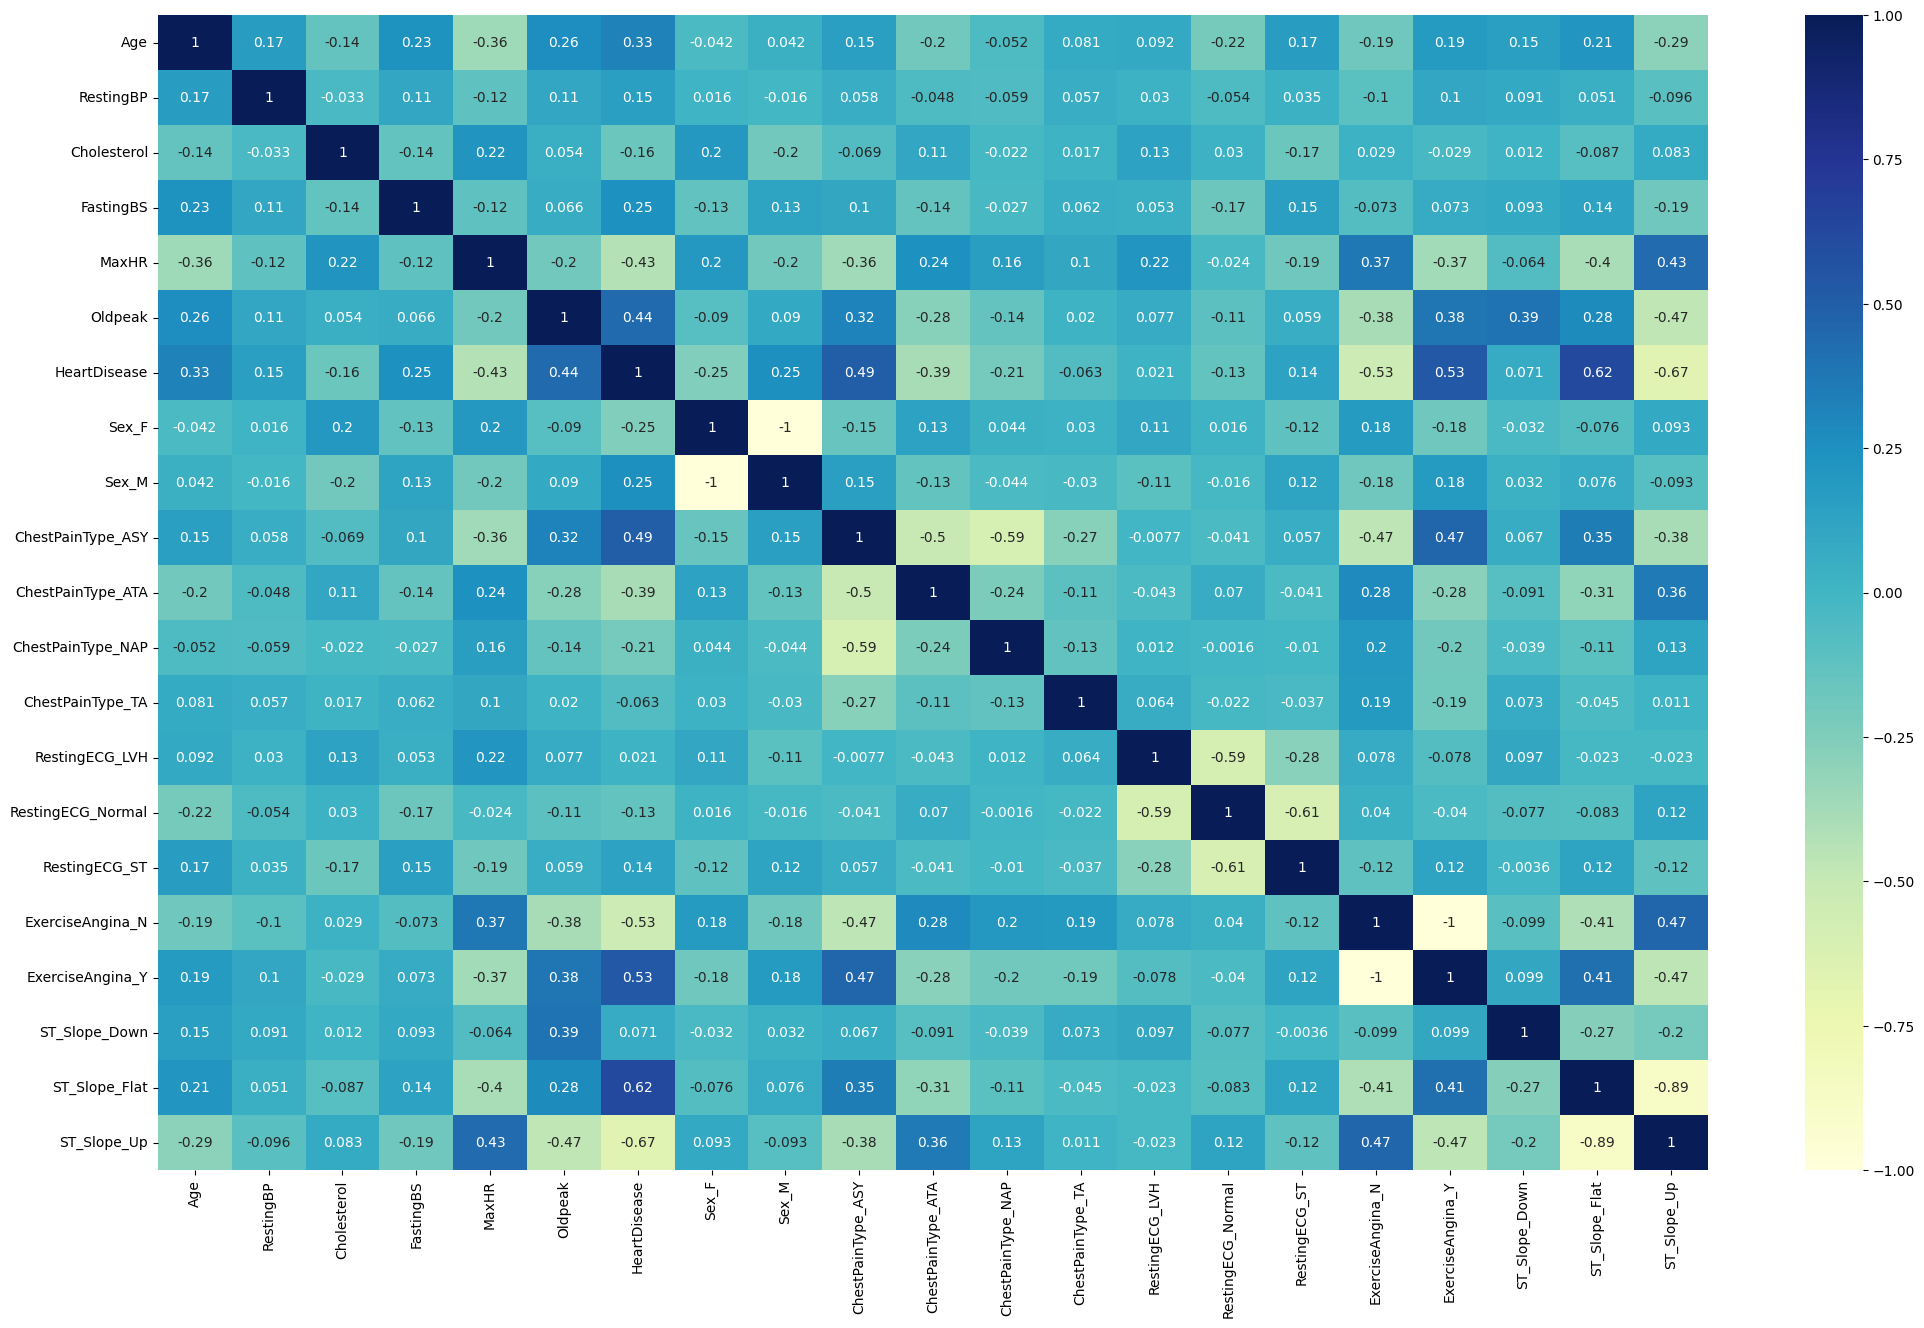

In [21]:
plt.figure(figsize = (25,15))
sns.heatmap(htd_patients1[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']].corr(), 
       cmap="YlGnBu", annot=True)

In [22]:
htd_patients2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

<Axes: >

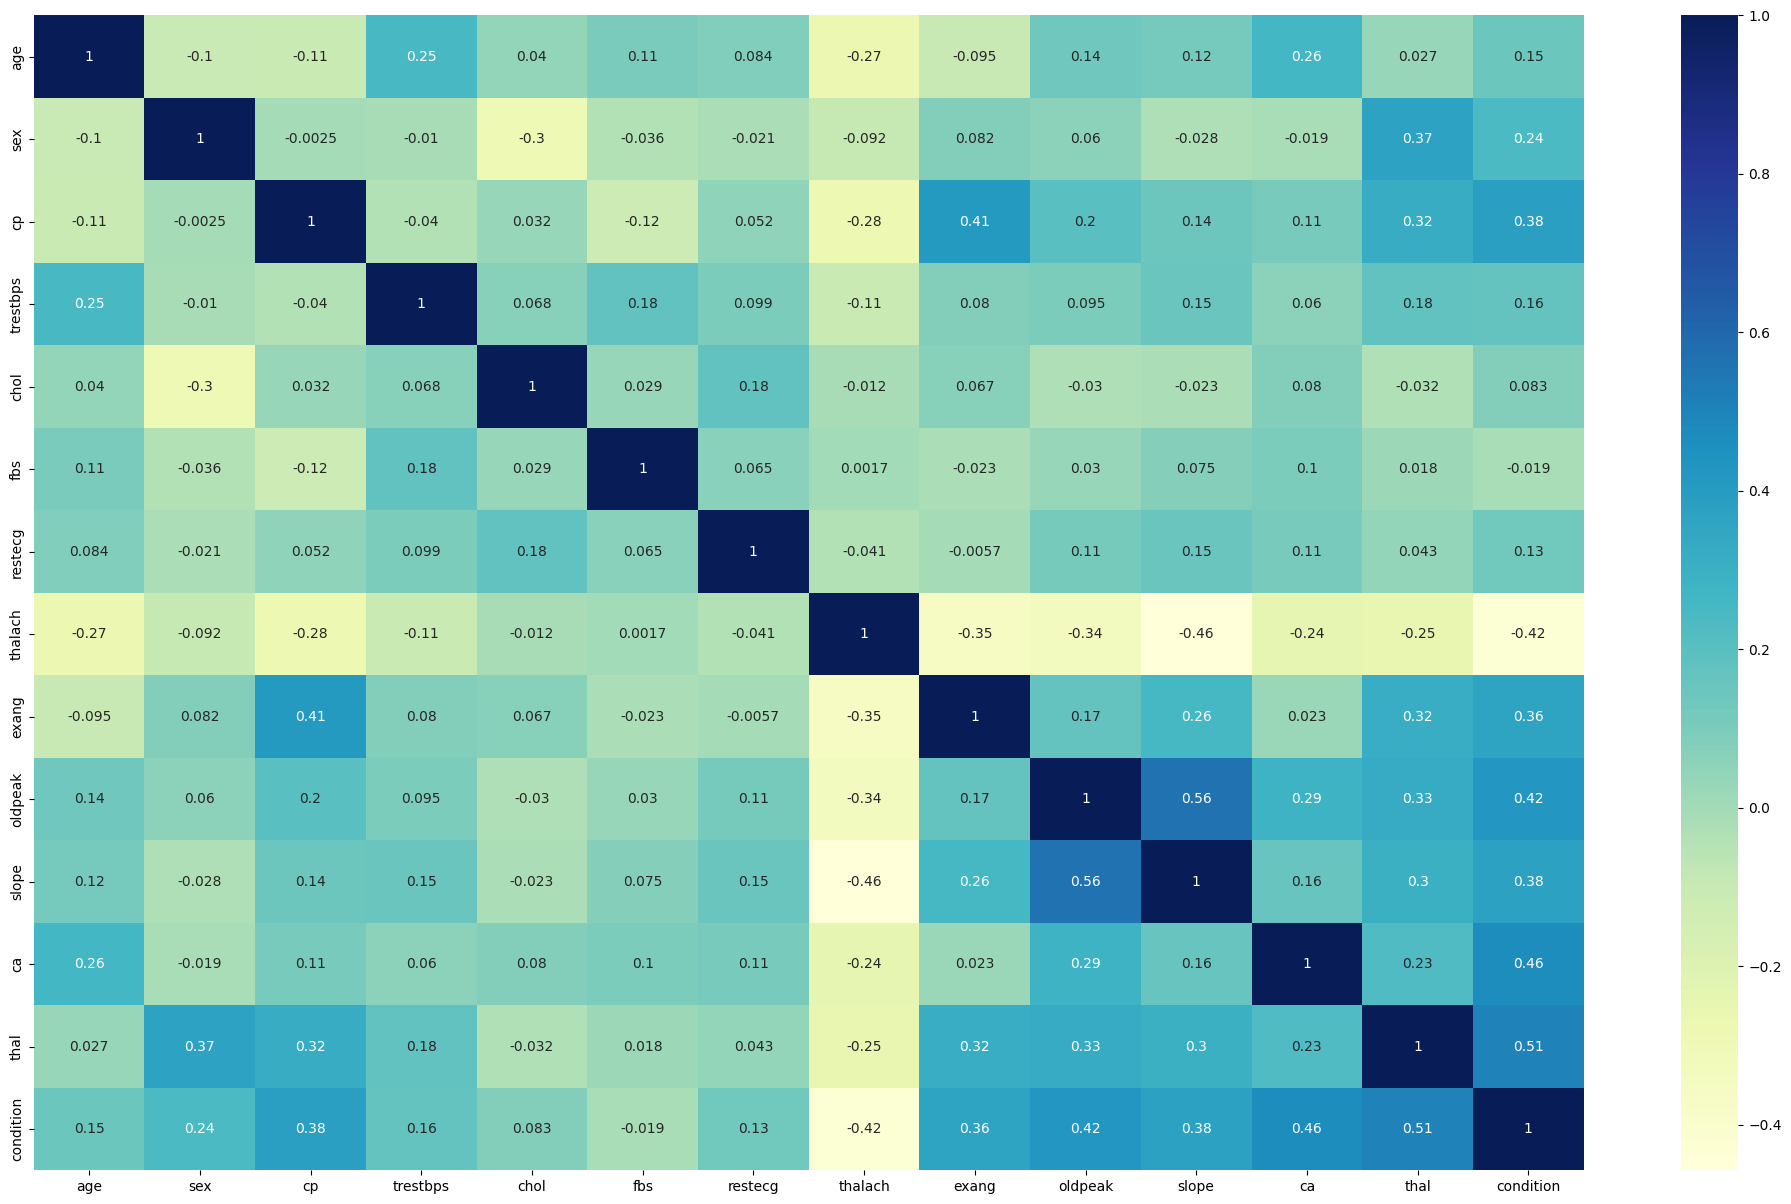

In [23]:
plt.figure(figsize = (25,15))
sns.heatmap(htd_patients2[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']].corr(), 
       cmap="YlGnBu", annot=True)

In [24]:
htd_patients1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [25]:
X1 = htd_patients1 [['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']]
Y1 = htd_patients1 [['HeartDisease']]

In [26]:
X_train, X_valid = X1[:500], X1[43:]
Y_train, Y_valid = Y1[:500], Y1[43:]

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
model.compile(loss="BinaryCrossentropy",
optimizer="adam",
metrics=["accuracy"])

In [29]:
history = model.fit(X1, Y1, epochs = 543,validation_data=(X_valid,Y_valid))

Epoch 1/543
17/17 [==============================] - 15s 153ms/step - loss: 0.8305 - accuracy: 0.5838 - val_loss: 0.6464 - val_accuracy: 0.6220
Epoch 2/543
17/17 [==============================] - 0s 15ms/step - loss: 0.6289 - accuracy: 0.6390 - val_loss: 0.6117 - val_accuracy: 0.6620
Epoch 3/543
17/17 [==============================] - 0s 15ms/step - loss: 0.6104 - accuracy: 0.6722 - val_loss: 0.5831 - val_accuracy: 0.7020
Epoch 4/543
17/17 [==============================] - 0s 22ms/step - loss: 0.5857 - accuracy: 0.6888 - val_loss: 0.5548 - val_accuracy: 0.7360
Epoch 5/543
17/17 [==============================] - 0s 18ms/step - loss: 0.5521 - accuracy: 0.7201 - val_loss: 0.5457 - val_accuracy: 0.7340
Epoch 6/543
17/17 [==============================] - 0s 16ms/step - loss: 0.5494 - accuracy: 0.7293 - val_loss: 0.5499 - val_accuracy: 0.7340
Epoch 7/543
17/17 [==============================] - 0s 13ms/step - loss: 0.5451 - accuracy: 0.7164 - val_loss: 0.5196 - val_accuracy: 0.7520
Epoc

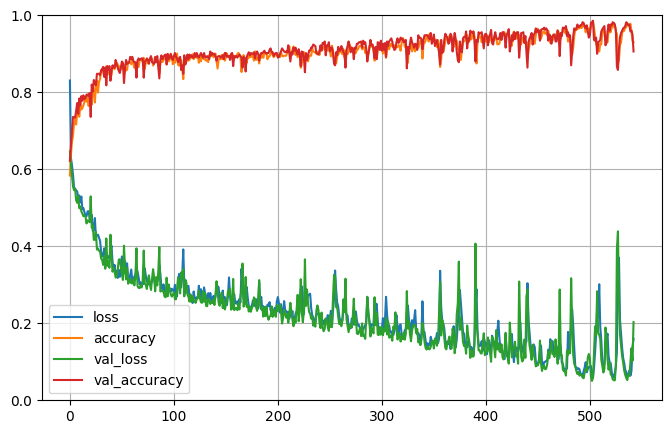

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.predict(x)